**DATA PREPROCESSING**

**LIBRARIES**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("datasets_house_prices.csv")
print(data.head())
print(data.isnull().sum())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [4]:
data['Size (sqft)'] = (data['Size (sqft)'] - data['Size (sqft)'].min()) / (data['Size (sqft)'].max() - data['Size (sqft)'].min())
data['Bedrooms'] = (data['Bedrooms'] - data['Bedrooms'].min()) / (data['Bedrooms'].max() - data['Bedrooms'].min())
data['Age'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min())
data['Proximity to Downtown (miles)'] = (data['Proximity to Downtown (miles)'] - data['Proximity to Downtown (miles)'].min()) / (data['Proximity to Downtown (miles)'].max() - data['Proximity to Downtown (miles)'].min())

print(data.head())

   Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)  \
0     0.992804      0.00  0.979798                       0.052059   
1     0.268773      1.00  0.888889                       0.787993   
2     0.404568      0.75  0.494949                       0.201794   
3     0.353254      0.25  0.282828                       0.259177   
4     0.342303      0.00  0.565657                       0.165056   

          Price  
0  1.162771e+06  
1  4.900021e+05  
2  6.400737e+05  
3  5.637881e+05  
4  5.651289e+05  


MODEL IMPLEMENTATION

In [5]:
def linear_regression(X, y, epochs=1000, lr=0.01):
    # Initialize weights (theta) and bias (intercept)
    m, n = X.shape
    theta = np.zeros(n)  # slope coefficients
    bias = 0  # intercept

    for _ in range(epochs):
        y_pred = np.dot(X, theta) + bias
        d_theta = -(2/m) * np.dot(X.T, (y - y_pred))  # Gradient for theta
        d_bias = -(2/m) * np.sum(y - y_pred)  # Gradient for bias
        theta -= lr * d_theta  # Update weights
        bias -= lr * d_bias  # Update intercept

    return theta, bias

In [6]:
X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']].values
y = data['Price'].values


In [7]:
theta, bias = linear_regression(X, y)

print(f"Model parameters (slopes): {theta}")
print(f"Model intercept: {bias}")

Model parameters (slopes): [804980.66633866   8190.78231072   9928.70741198  -2242.47801108]
Model intercept: 303246.04962246557


MODEL DEVELOPMENT

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

theta_train, bias_train = linear_regression(X_train, y_train)

def predict(X, theta, bias):
    return np.dot(X, theta) + bias


y_train_pred = predict(X_train, theta_train, bias_train)


mse_train = np.mean((y_train - y_train_pred) ** 2)
print(f"Training MSE: {mse_train}")

Training MSE: 2166894633.599491


MODEL EVALUATION

Test MSE: 1933542722.2415838


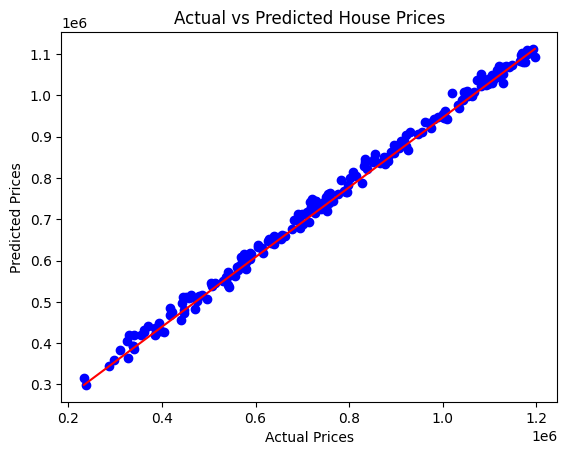

In [10]:
y_test_pred = predict(X_test, theta_train, bias_train)


mse_test = np.mean((y_test - y_test_pred) ** 2)
print(f"Test MSE: {mse_test}")


plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()